In [96]:
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing
from graphviz import Digraph

 Normal distribution -- eclipse 
 Exponential distribution -- diamond


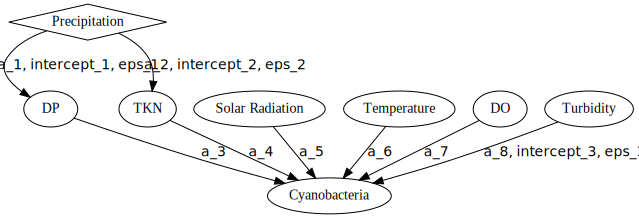

In [118]:
print(" Normal distribution -- eclipse \n Exponential distribution -- diamond" )
dot = Digraph(comment='A simple Graph')
dot.node('A', 'Precipitation', shape='diamond')
dot.node('B', 'DP')
dot.node('C', 'TKN')
dot.node('D', 'Solar Radiation')
dot.node('E', 'Temperature')
dot.node('F', 'DO')
dot.node('G', 'Turbidity')
dot.node('H', 'Cyanobacteria')
dot.edge("A", "B", label="a_1, intercept_1, eps_1", fontname="Calibri")
dot.edge("A", "C", label="a_2, intercept_2, eps_2", fontname="Calibri")
dot.edge("B", "H", label="a_3", fontname="Calibri")
dot.edge("C", "H", label="a_4", fontname="Calibri")
dot.edge("D", "H", label="a_5", fontname="Calibri")
dot.edge("E", "H", label="a_6", fontname="Calibri")
dot.edge("F", "H", label="a_7", fontname="Calibri")
dot.edge("G", "H", label="a_8, intercept_3, eps_3", fontname="Calibri")
#dot.edges(['AB', 'AC','BH','CH','DH','EH','FH','GH'])
dot.render('my_graph', view=False) 
dot


In [ ]:
#Gaussian Linear Bayesian Network

In [121]:
df=pd.read_csv("cyano_train.csv")
df=df.rename(columns={"PRECTOT": "prec", "ALLSKY_SFC_SW_DWN": "solar"})
df.head()

,Unnamed: 0,prec,solar,Date,DO,TKN,DP,Turb,Temp,Cyano
0,0,1.47,14.15,2011-03-14,11.60,0.537,0.15,18.2,5.2,1
1,1,3.13,20.15,2010-07-29,5.40,0.530,0.14,30.4,27.9,1
2,2,2.99,11.54,2010-09-08,7.17,0.598,0.21,40.6,23.1,268
3,3,0.00,19.14,2008-10-01,8.26,0.650,0.06,15.4,21.6,25661
4,4,0.00,25.03,2010-08-26,6.47,0.538,0.18,37.8,26.0,1


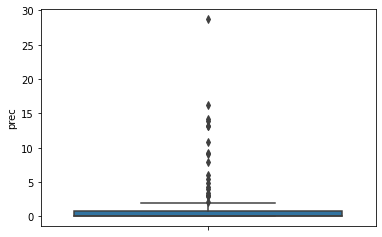

In [122]:
#boxplot and exclude outliers using z-score
df_prec = pd.DataFrame(df['prec'])
sns.boxplot(y='prec', data=df)
df_prec['z_score']=stats.zscore(df_prec['prec'])
df_prec=df_prec.loc[df_prec['z_score'].abs()<=3]

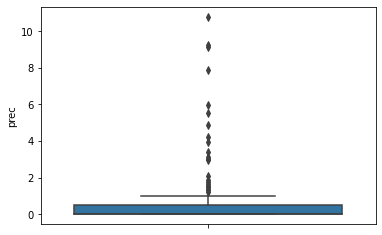

In [123]:
#boxplot after removing the outliers
sns.boxplot(y='prec', data=df_prec)

([<matplotlib.axis.YTick at 0x7fde47227e50>],
 <a list of 1 Text major ticklabel objects>)

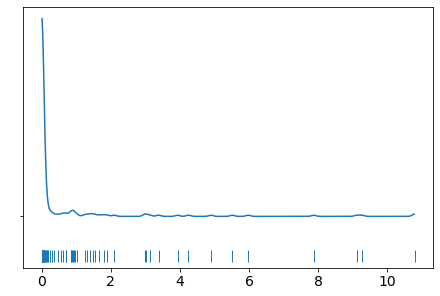

In [124]:
#kde plot
az.plot_kde(df_prec['prec'].values, rug=True)
plt.yticks([0], alpha=0)

/opt/anaconda3/lib/python3.8/site-packages/pymc3/distributions/continuous.py:138: UserWarning: The variable specified for lam has negative support for Exponential, likely making it unsuitable for this parameter.
  warnings.warn(msg)
<ipython-input-125-b6cbf922395a>:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_prec = pm.sample(1000, tune=1000, cores=3)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [lambda_1]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 20 seconds.
The acceptance probability does not match the target. It is 0.9015195452824646, but should be close to 0.8. Try to increase the number of tuning steps.
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde476450d0>,
      dtype=object)

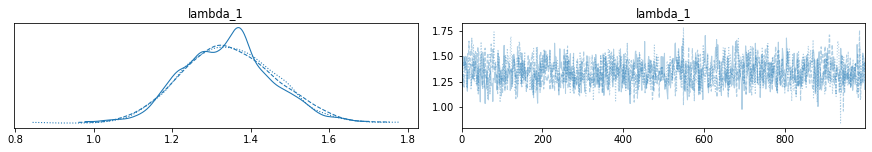

In [125]:
#Build the model of precipitation
with pm.Model() as model_prec:
    lambda_1 = pm.Normal("lambda_1", mu = 3, sd=1)
    precipitation = pm.Exponential("precipitation", lam=lambda_1, observed = df_prec['prec'])
with model_prec:
    trace_prec = pm.sample(1000, tune=1000, cores=3)
az.plot_trace(trace_prec)

In [126]:
az.summary(trace_prec)

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lambda_1,1.343,0.116,1.127,1.554,0.003,0.002,1254.0,1716.0,1.0


/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-88-0186b6c0be65>:5: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  pm.energyplot(trace_prec, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Text(0.5, 1.0, 'BFMI = 1.403882340004392\nGelman-Rubin = 1.0034378167492195')

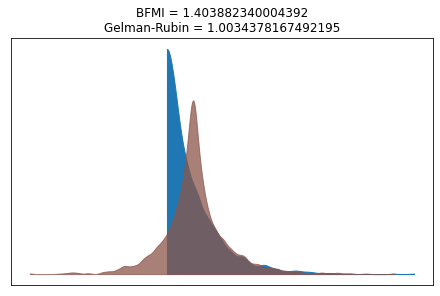

In [88]:
#evaluation metrics to see if NUTS sampler converged.
bfmi = np.max(pm.stats.bfmi(trace_prec))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_prec).values()).values
(
    pm.energyplot(trace_prec, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)
#bfmi:Bayesian fraction of missing information,
#Reference:https://arxiv.org/pdf/1604.00695.pdf
#"in the worst case BFMI → 0 and the momentum resampling induces very slow exploration across the level sets, while in the best case BFMI → 1 and the momentum resampling effectively generates exact draws from the marginal energy distribution."

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


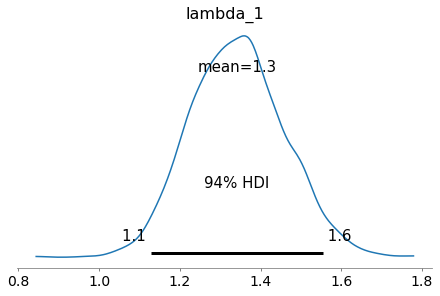

In [127]:
#HDP intervals
az.plot_posterior(trace_prec)

([<matplotlib.axis.YTick at 0x7fde56457670>],
 <a list of 1 Text major ticklabel objects>)

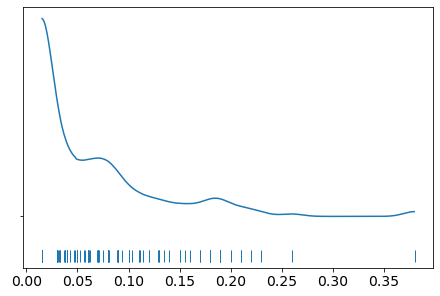

In [128]:
#DP
az.plot_kde(df['DP'].values, rug=True)
plt.yticks([0], alpha=0)

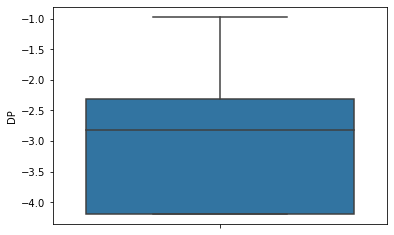

In [129]:
#boxplot and log transform
df_dp = pd.DataFrame(df['DP'])
df_dp['DP']=df_dp['DP'].apply(np.log)
sns.boxplot(y='DP', data=df_dp)
#do not need to remove outliers

([<matplotlib.axis.YTick at 0x7fde71b24f10>],
 <a list of 1 Text major ticklabel objects>)

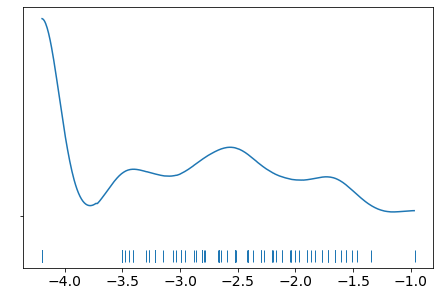

In [130]:
#replot distribution
az.plot_kde(df_dp['DP'].values, rug=True)
plt.yticks([0], alpha=0)

<ipython-input-131-0a10f4fb4ac0>:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_dp = pm.sample(2000, tune=2000, target_accept=0.9)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [eps_1, intercept_1, a_1]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
<ipython-input-131-0a10f4fb4ac0>:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_dp, var_names=['a_1', 'intercept_1', 'eps_1'])


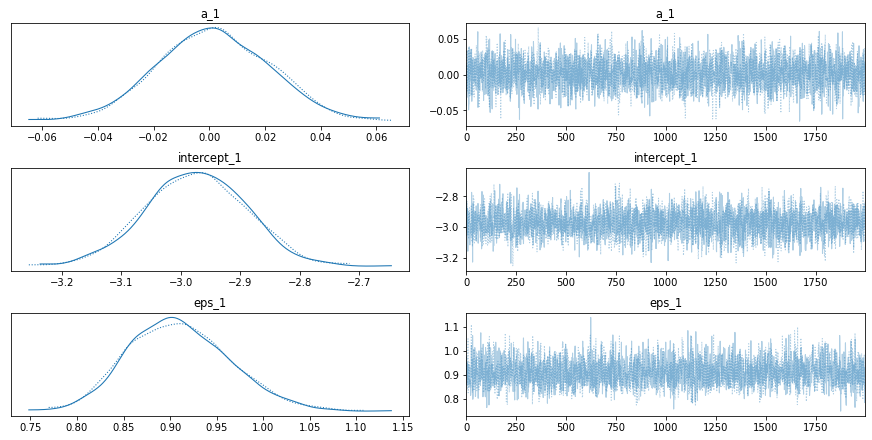

In [131]:
#Build the model for DP
with pm.Model() as model_dp:
    #model of parameters
    a_1 = pm.Normal("a_1", mu=0, sd=1)
    intercept_1 = pm.Normal("intercept_1", mu=0, sd=1)
    eps_1 = pm.HalfCauchy('eps_1', 5.)
    #deterministic model
    mu_1 = pm.Deterministic("mu_1", a_1*df['prec']+intercept_1)
    #likelihood
    dp=pm.Normal("dp", mu=mu_1, sd=eps_1, observed = df_dp['DP'])
    trace_dp = pm.sample(2000, tune=2000, target_accept=0.9)
    pm.traceplot(trace_dp, var_names=['a_1', 'intercept_1', 'eps_1'])

In [120]:
a1 = az.summary(trace_dp).head(3)
a1

NameError: name 'trace_dp' is not defined

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-15-d4ab20b80960>:4: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  pm.energyplot(trace_dp, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Text(0.5, 1.0, 'BFMI = 1.1803253623180006\nGelman-Rubin = 1.0006875186827522')

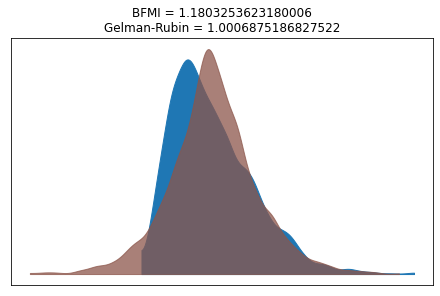

In [15]:
bfmi = np.max(pm.stats.bfmi(trace_dp))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_dp).values()).values
(
    pm.energyplot(trace_dp, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

([<matplotlib.axis.YTick at 0x7fa379a1a160>],
 <a list of 1 Text major ticklabel objects>)

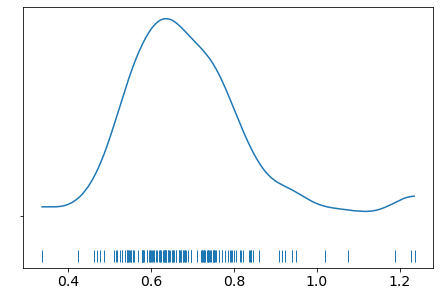

In [17]:
#TKN
az.plot_kde(df['TKN'].values, rug=True)
plt.yticks([0], alpha=0)

<ipython-input-40-e0113389456f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkn['TKN']=df_tkn['TKN'].apply(np.log)


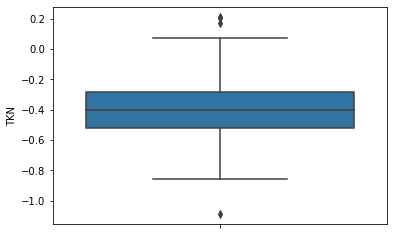

In [40]:
#boxplot and log transform
df_tkn = df[['prec','TKN']]
df_tkn['TKN']=df_tkn['TKN'].apply(np.log)
sns.boxplot(y='TKN', data=df_tkn)

<ipython-input-43-e5e2c7d0ed9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkn['z_score']=stats.zscore(df_tkn['TKN'])


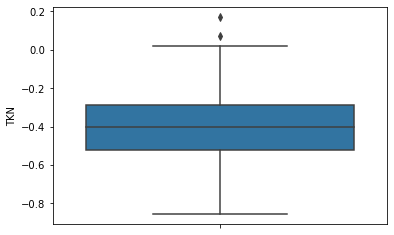

In [43]:
#re-boxplot
df_tkn['z_score']=stats.zscore(df_tkn['TKN'])
df_tkn=df_tkn.loc[df_tkn['z_score'].abs()<=3]
sns.boxplot(y='TKN', data=df_tkn)

([<matplotlib.axis.YTick at 0x7fa395f9cb20>],
 <a list of 1 Text major ticklabel objects>)

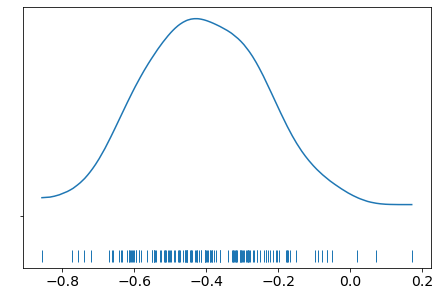

In [53]:
#replot log
az.plot_kde(df_tkn['TKN'].values, rug=True)
plt.yticks([0], alpha=0)

<ipython-input-44-fc3e3ed8f6e1>:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_tkn = pm.sample(2000, tune=2000, target_accept=0.9)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [eps_2, intercept_2, a_2]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.
<ipython-input-44-fc3e3ed8f6e1>:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_tkn, var_names=['a_2', 'intercept_2', 'eps_2'])


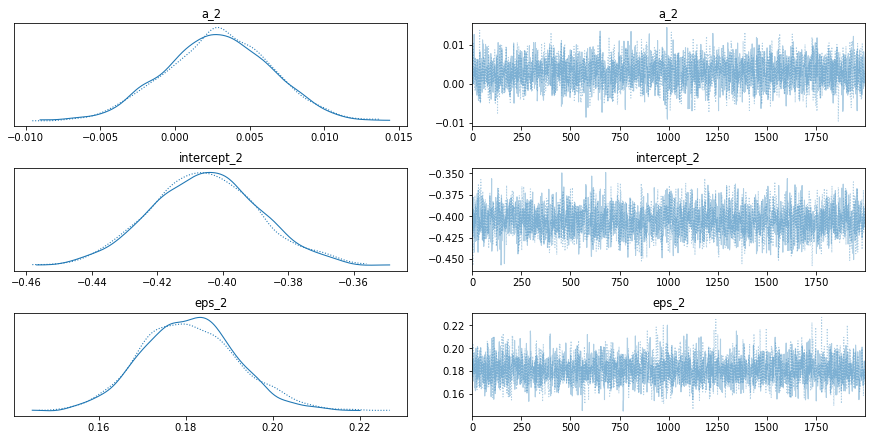

In [44]:
#Build the model for TKN
with pm.Model() as model_tkn:
    #model of parameters
    a_2 = pm.Normal("a_2", mu=0, sd=1)
    intercept_2 = pm.Normal("intercept_2", mu=0, sd=1)
    eps_2 = pm.HalfCauchy('eps_2', 5.)
    #deterministic model  
    mu_2 = pm.Deterministic("mu_2", a_2*df_tkn['prec']+intercept_2)
    #likelihood
    tkn=pm.Normal("tkn", mu=mu_2, sd=eps_2, observed = df_tkn['TKN'])
    trace_tkn = pm.sample(2000, tune=2000, target_accept=0.9)
    pm.traceplot(trace_tkn, var_names=['a_2', 'intercept_2', 'eps_2'])

In [50]:
a2 = az.summary(trace_tkn).head(3)

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_2,0.003,0.004,-0.004,0.009,0.0,0.0,2609.0,2423.0,1.0
intercept_2,-0.405,0.017,-0.436,-0.372,0.0,0.0,2440.0,2470.0,1.0
eps_2,0.181,0.011,0.160,0.202,0.0,0.0,2978.0,2314.0,1.0


/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-67-d0e210bf9ad1>:4: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  pm.energyplot(trace_tkn, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Text(0.5, 1.0, 'BFMI = 1.1410297581176516\nGelman-Rubin = 1.0006613374560382')

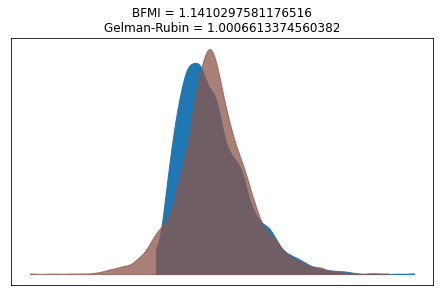

In [67]:
bfmi = np.max(pm.stats.bfmi(trace_tkn))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_tkn).values()).values
(
    pm.energyplot(trace_tkn, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

([<matplotlib.axis.YTick at 0x7fbfc317a4c0>],
 <a list of 1 Text major ticklabel objects>)

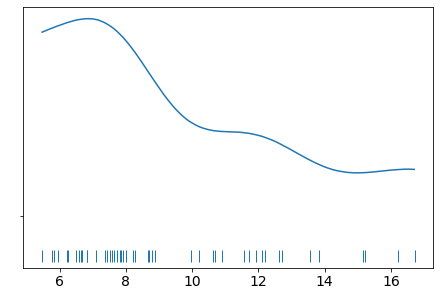

In [21]:
#DO
az.plot_kde(df['DO'].values, rug=True)
plt.yticks([0], alpha=0)

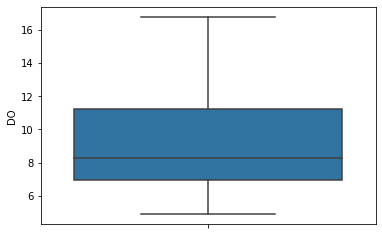

In [60]:
sns.boxplot(y='DO', data=df)

<ipython-input-61-26e2447432f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_do['DO']=df_do['DO'].apply(np.log)


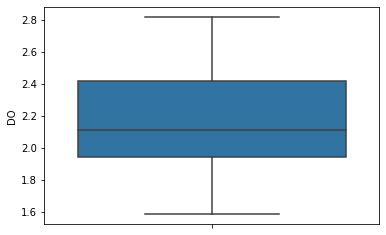

In [61]:
df_do = df[['DO']]
df_do['DO']=df_do['DO'].apply(np.log)
sns.boxplot(y='DO', data=df_do)

([<matplotlib.axis.YTick at 0x7fa379a0bd60>],
 <a list of 1 Text major ticklabel objects>)

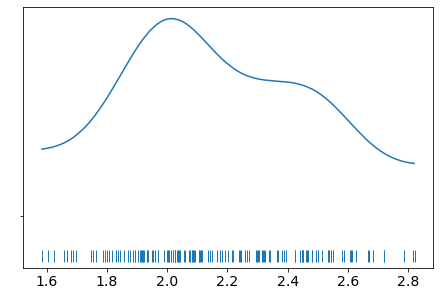

In [62]:
az.plot_kde(df_do['DO'].values, rug=True)
plt.yticks([0], alpha=0)

<ipython-input-64-fb7d8159deac>:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_do = pm.sample(2000, tune=2000, target_accept=0.9)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_3, mu_3]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.
<ipython-input-64-fb7d8159deac>:9: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_do, var_names=['mu_3', 'sigma_3'])


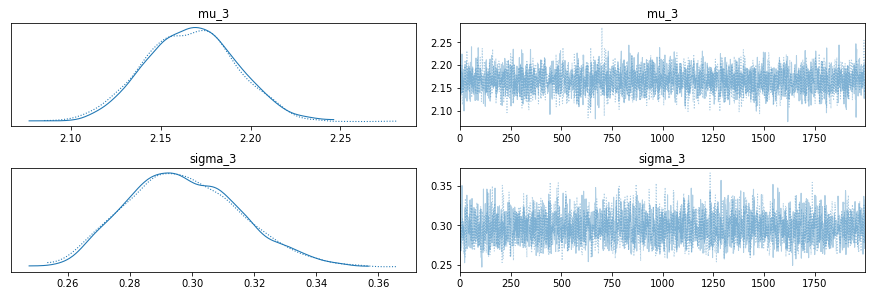

In [64]:
#Build the model for DO
with pm.Model() as model_do:
    #model of parameters
    mu_3 = pm.Uniform("mu_3", lower=1.6, upper=2.8)
    sigma_3 = pm.HalfNormal('sigma_3', sd=1)
    #likelihood
    do=pm.Normal("do", mu=mu_3, sd=sigma_3, observed = df_do['DO'])
    trace_do = pm.sample(2000, tune=2000, target_accept=0.9)
    pm.traceplot(trace_do, var_names=['mu_3', 'sigma_3'])

In [65]:
az.summary(trace_do)

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_3,2.167,0.025,2.122,2.216,0.0,0.0,3681.0,2904.0,1.0
sigma_3,0.297,0.018,0.265,0.331,0.0,0.0,3163.0,2501.0,1.0


/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-66-6a65e59cd8d2>:4: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  pm.energyplot(trace_do, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Text(0.5, 1.0, 'BFMI = 1.1993424839901117\nGelman-Rubin = 1.0014208334902845')

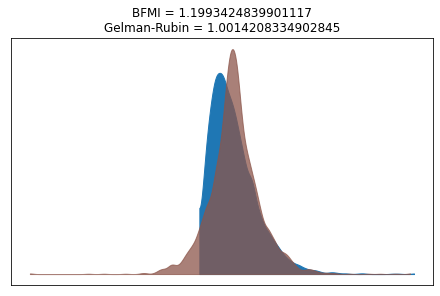

In [66]:
bfmi = np.max(pm.stats.bfmi(trace_do))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_do).values()).values
(
    pm.energyplot(trace_do, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

([<matplotlib.axis.YTick at 0x7fa37ee4e100>],
 <a list of 1 Text major ticklabel objects>)

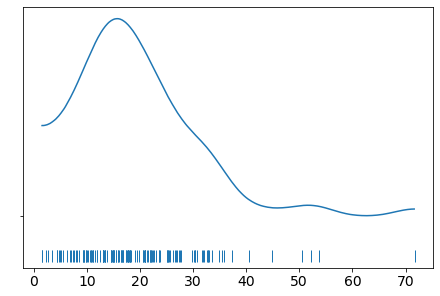

In [68]:
#Turbidity
az.plot_kde(df['Turb'].values, rug=True)
plt.yticks([0], alpha=0)

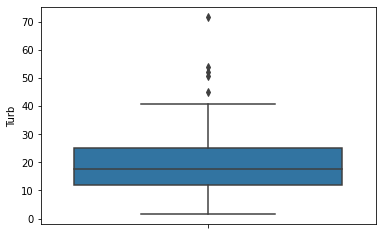

In [69]:
sns.boxplot(y='Turb', data=df)

<ipython-input-71-1ff23af87dde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_turb['Turb']=df_turb['Turb'].apply(np.log)
<ipython-input-71-1ff23af87dde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_turb['z_score']=stats.zscore(df_turb['Turb'])


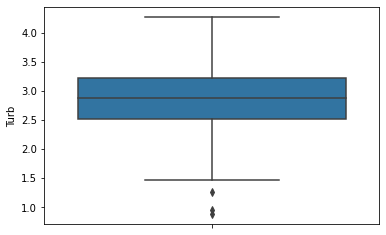

In [71]:
df_turb = df[['Turb']]
df_turb['Turb']=df_turb['Turb'].apply(np.log)
df_turb['z_score']=stats.zscore(df_turb['Turb'])
df_turb=df_turb.loc[df_turb['z_score'].abs()<=3]
sns.boxplot(y='Turb', data=df_turb)

([<matplotlib.axis.YTick at 0x7fa3806817c0>],
 <a list of 1 Text major ticklabel objects>)

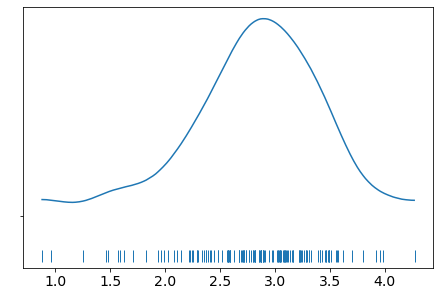

In [72]:
az.plot_kde(df_turb['Turb'].values, rug=True)
plt.yticks([0], alpha=0)

<ipython-input-75-99b20fbb8d44>:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_turb = pm.sample(2000, tune=2000, target_accept=0.9)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_4, mu_4]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
<ipython-input-75-99b20fbb8d44>:9: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_turb, var_names=['mu_4', 'sigma_4'])


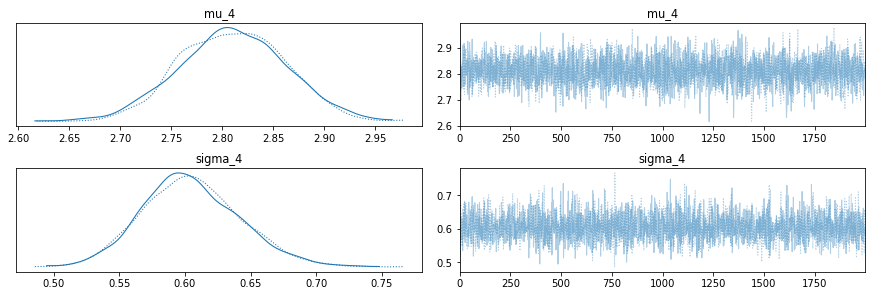

In [75]:
#Build the model for Turbidity
with pm.Model() as model_turb:
    #model of parameters
    mu_4 = pm.Uniform("mu_4", lower=2.5, upper=3.5)
    sigma_4 = pm.HalfNormal('sigma_4', sd=1)
    #likelihood
    turb = pm.Normal("turb", mu=mu_4, sd=sigma_4, observed = df_turb['Turb'])
    trace_turb = pm.sample(2000, tune=2000, target_accept=0.9)
    pm.traceplot(trace_turb, var_names=['mu_4', 'sigma_4'])

In [76]:
az.summary(trace_turb)

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_4,2.810,0.052,2.711,2.902,0.001,0.001,3294.0,2494.0,1.0
sigma_4,0.605,0.037,0.535,0.673,0.001,0.000,3578.0,2795.0,1.0


/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-77-5f9cc50d71a4>:4: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  pm.energyplot(trace_turb, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Text(0.5, 1.0, 'BFMI = 1.1904582817687934\nGelman-Rubin = 1.0004719301444982')

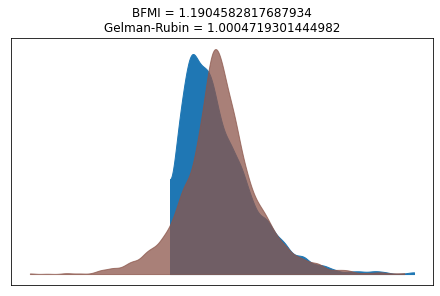

In [77]:
bfmi = np.max(pm.stats.bfmi(trace_turb))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_turb).values()).values
(
    pm.energyplot(trace_turb, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

/opt/anaconda3/lib/python3.8/site-packages/arviz/plots/jointplot.py:144: UserWarning: plot_joint will be deprecated. Please use plot_pair instead.
  warnings.warn("plot_joint will be deprecated. Please use plot_pair instead.")
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3823e94f0>,
      dtype=object)

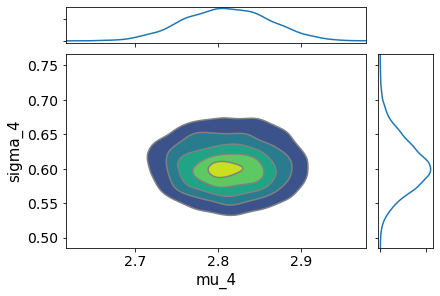

In [78]:
az.plot_joint(trace_turb, kind='kde', fill_last=False)

In [25]:
df_sp = pd.read_csv("solar&prec.csv")
df_sp=df_sp.rename(columns={"PRECTOT": "prec", "ALLSKY_SFC_SW_DWN": "solar"})
df_sp.head()

,LAT,LON,YEAR,MO,DY,prec,solar,Date
0,37.72531,-97.79759,2002,8,7,0.00,22.07,2002-08-07
1,37.72531,-97.79759,2002,8,8,0.18,23.90,2002-08-08
2,37.72531,-97.79759,2002,8,9,4.11,17.39,2002-08-09
3,37.72531,-97.79759,2002,8,10,1.27,11.70,2002-08-10
4,37.72531,-97.79759,2002,8,11,14.62,23.22,2002-08-11


In [44]:
#solar radiation
solar = pd.DataFrame(df_sp[['solar', 'MO']])
solar['z_score']=stats.zscore(solar['solar'])
solar=solar.loc[solar['z_score'].abs()<=3]
summer = solar.loc[(solar['MO'] >3) & (solar['MO']<10)]
winter = solar.loc[(solar['MO'] <4) | (solar['MO']>9)]

([<matplotlib.axis.YTick at 0x7fde71fcb6d0>],
 <a list of 1 Text major ticklabel objects>)

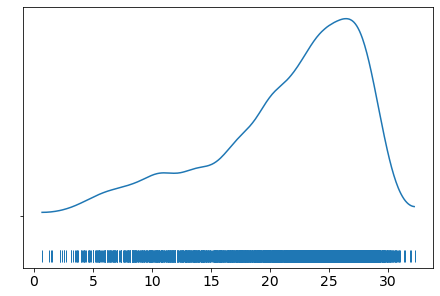

In [45]:
az.plot_kde(summer['solar'].values, rug=True)
plt.yticks([0], alpha=0)

([<matplotlib.axis.YTick at 0x7fde720d60d0>],
 <a list of 1 Text major ticklabel objects>)

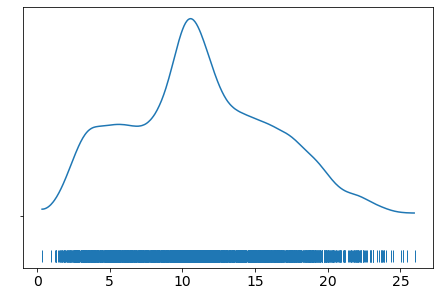

In [46]:
az.plot_kde(winter['solar'].values, rug=True)
plt.yticks([0], alpha=0)

In [52]:
#Mixture model of solar radiation
with pm.Model() as model_solar:
    mu_5 = pm.Uniform('mu_5', lower = 20, upper = 30)
    mu_6 = pm.Uniform('mu_6', lower = 5, upper = 15)
    sigma_5 = pm.HalfNormal('sigma_5', sd=1)
    sigma_6 = pm.HalfNormal('sigma_6', sd=1)
    norm_5 = pm.Normal.dist(mu=mu_5, sd=sigma_5)
    norm_6 = pm.Normal.dist(mu=mu_6, sd=sigma_6)
    w = pm.Dirichlet('w', a=np.array([1, 1]))
    like = pm.Mixture('like', w=w, comp_dists = [norm_5, norm_6], observed=solar['solar'])

<ipython-input-51-e030240ad149>:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_solar = pm.sample(1000, cores=1)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [w, sigma_6, sigma_5, mu_6, mu_5]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 27 seconds.
The number of effective samples is smaller than 25% for some parameters.
<ipython-input-51-e030240ad149>:3: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_solar, var_names=['mu_5', 'mu_6','sigma_5','sigma_6','w'])


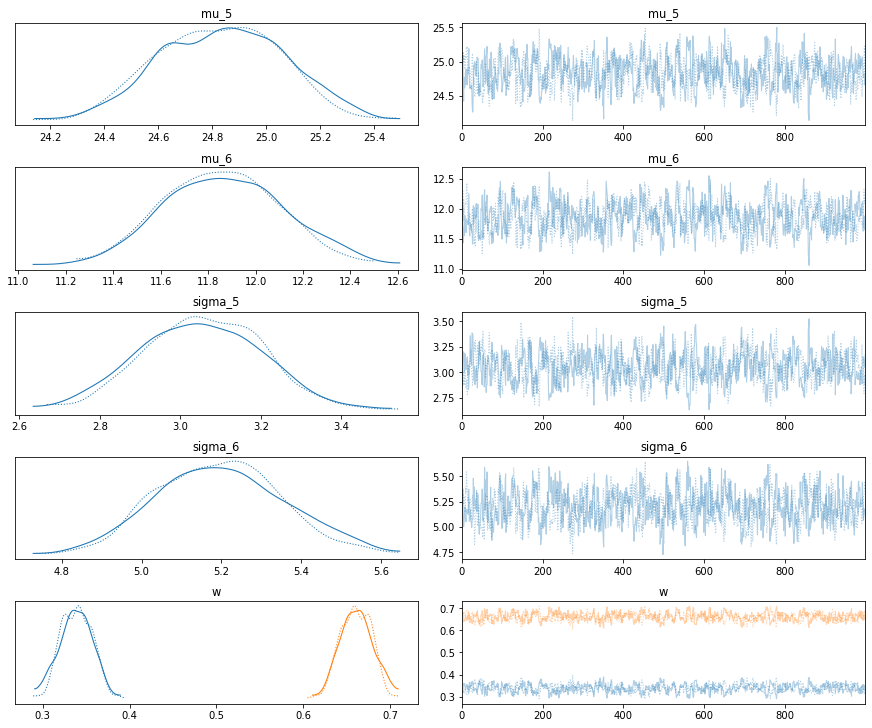

In [51]:
with model_solar:
    trace_solar = pm.sample(1000, cores=1)
    pm.traceplot(trace_solar, var_names=['mu_5', 'mu_6','sigma_5','sigma_6','w'])

In [53]:
az.summary(trace_solar)

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_5,24.834,0.227,24.405,25.225,0.011,0.008,411.0,833.0,1.0
mu_6,11.863,0.245,11.403,12.314,0.012,0.009,401.0,722.0,1.0
sigma_5,3.054,0.147,2.783,3.322,0.007,0.005,434.0,726.0,1.0
sigma_6,5.196,0.155,4.907,5.490,0.007,0.005,441.0,809.0,1.0
w[0],0.339,0.018,0.305,0.371,0.001,0.001,408.0,712.0,1.0
w[1],0.661,0.018,0.629,0.695,0.001,0.001,408.0,712.0,1.0


/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-55-12b5b1476b78>:4: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  pm.energyplot(trace_solar, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Text(0.5, 1.0, 'BFMI = 1.2552599766565273\nGelman-Rubin = 1.001984034957593')

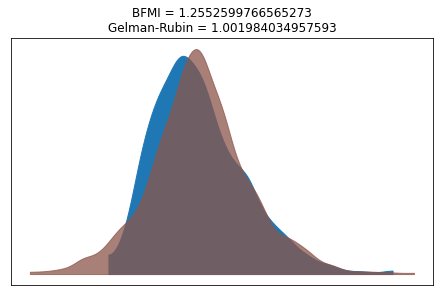

In [55]:
bfmi = np.max(pm.stats.bfmi(trace_solar))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_solar).values()).values
(
    pm.energyplot(trace_solar, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

In [56]:
df_temp = pd.read_csv("temperature.csv")
df_temp=df_temp.rename(columns={"T2M": "temp"})
df_temp.head()

,LAT,LON,YEAR,MO,DY,temp
0,37.72531,-97.79759,2002,8,7,29.45
1,37.72531,-97.79759,2002,8,8,28.69
2,37.72531,-97.79759,2002,8,9,28.01
3,37.72531,-97.79759,2002,8,10,26.11
4,37.72531,-97.79759,2002,8,11,27.20


In [61]:
#Temperature
temp = pd.DataFrame(df_temp[['temp', 'MO']])
temp['z_score']=stats.zscore(temp['temp'])
temp=temp.loc[temp['z_score'].abs()<=3]
summer = temp.loc[(temp['MO'] >3) & (temp['MO']<10)]
winter = temp.loc[(temp['MO'] <4) | (temp['MO']>9)]

([<matplotlib.axis.YTick at 0x7fde57ae7d60>],
 <a list of 1 Text major ticklabel objects>)

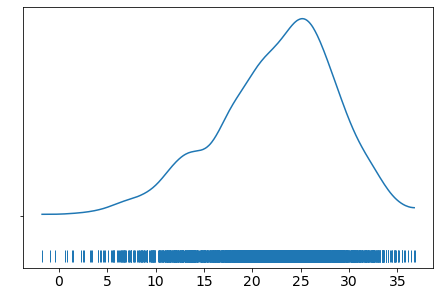

In [59]:
az.plot_kde(summer['temp'].values, rug=True)
plt.yticks([0], alpha=0)

([<matplotlib.axis.YTick at 0x7fde7000f460>],
 <a list of 1 Text major ticklabel objects>)

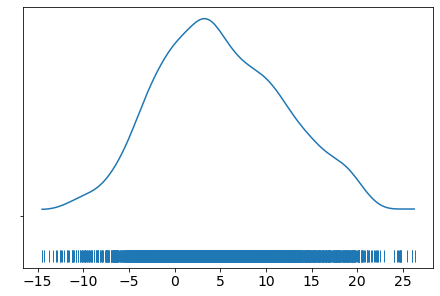

In [62]:
az.plot_kde(winter['temp'].values, rug=True)
plt.yticks([0], alpha=0)

<ipython-input-63-c08614af7d89>:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_temp = pm.sample(1000, cores=1)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [w, sigma_8, sigma_7, mu_8, mu_7]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 36 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 72 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6037278356202971, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
<ipython-input-63-c08614af7d89>:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_temp, var_names=['mu_7', 'mu_8','sigma_7','sigma_8','w'])


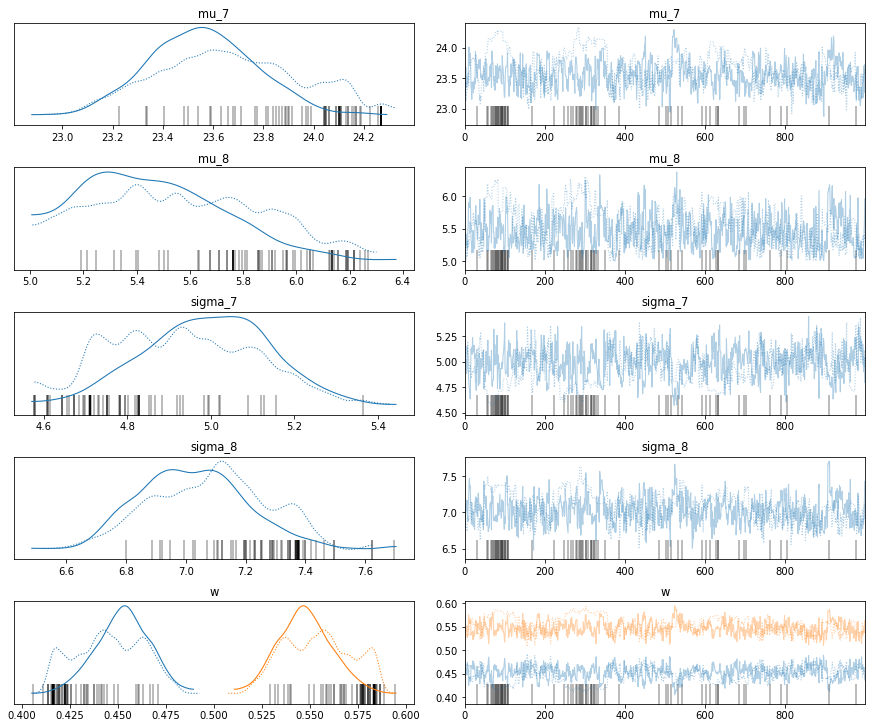

In [63]:
#Mixture model of solar radiation
with pm.Model() as model_temp:
    mu_7 = pm.Uniform('mu_7', lower = 20, upper = 30)
    mu_8 = pm.Uniform('mu_8', lower = 5, upper = 15)
    sigma_7 = pm.HalfNormal('sigma_7', sd=1)
    sigma_8 = pm.HalfNormal('sigma_8', sd=1)
    norm_7 = pm.Normal.dist(mu=mu_7, sd=sigma_7)
    norm_8 = pm.Normal.dist(mu=mu_8, sd=sigma_8)
    w = pm.Dirichlet('w', a=np.array([1, 1]))
    like = pm.Mixture('like', w=w, comp_dists = [norm_7, norm_8], observed=temp['temp'])
    trace_temp = pm.sample(1000, cores=1)
    pm.traceplot(trace_temp, var_names=['mu_7', 'mu_8','sigma_7','sigma_8','w'])

In [64]:
az.summary(trace_temp)

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_7,23.612,0.261,23.175,24.147,0.034,0.025,65.0,67.0,1.05
mu_8,5.513,0.293,5.009,6.005,0.035,0.025,78.0,90.0,1.03
sigma_7,4.961,0.164,4.683,5.269,0.019,0.014,75.0,131.0,1.03
sigma_8,7.055,0.192,6.729,7.413,0.021,0.015,86.0,203.0,1.03
w[0],0.449,0.017,0.415,0.474,0.002,0.002,60.0,54.0,1.07
w[1],0.551,0.017,0.526,0.585,0.002,0.002,60.0,54.0,1.07


/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-65-6acb6d74689d>:4: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  pm.energyplot(trace_temp, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Text(0.5, 1.0, 'BFMI = 1.0528057438069394\nGelman-Rubin = 1.0682757900540705')

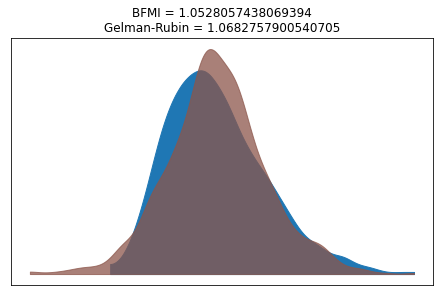

In [65]:
bfmi = np.max(pm.stats.bfmi(trace_temp))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_temp).values()).values
(
    pm.energyplot(trace_temp, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

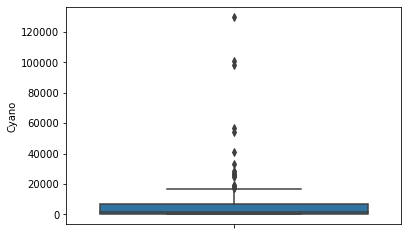

In [84]:
#Cyanobacteria
df_cyano = pd.DataFrame(df[['Cyano','DP','TKN','solar','Temp','Turb','DO']])
sns.boxplot(y='Cyano', data=df_cyano)
df_cyano['Cyano']=df_cyano['Cyano'].apply(np.log)
df_cyano['z_score']=stats.zscore(df_cyano['Cyano'])
df_cyano=df_cyano.loc[df_cyano['z_score'].abs()<=1.5]

([<matplotlib.axis.YTick at 0x7fde5500d940>],
 <a list of 1 Text major ticklabel objects>)

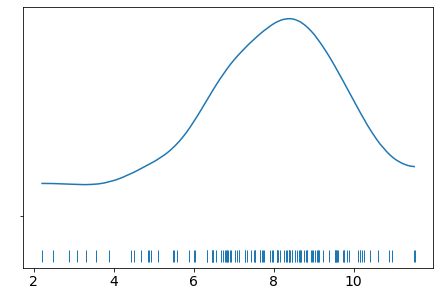

In [85]:
az.plot_kde(df_cyano['Cyano'].values, rug=True)
plt.yticks([0], alpha=0)

<ipython-input-87-7393d822b58a>:16: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_cyano = pm.sample(2000, tune=2000, target_accept=0.9)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [eps_3, intercept_3, a_8, a_7, a_6, a_5, a_4, a_3]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 49 seconds.
<ipython-input-87-7393d822b58a>:17: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_cyano, var_names=['a_3', 'a_4', 'a_5', 'a_6', 'a_7','a_8','intercept_3', 'eps_3'])


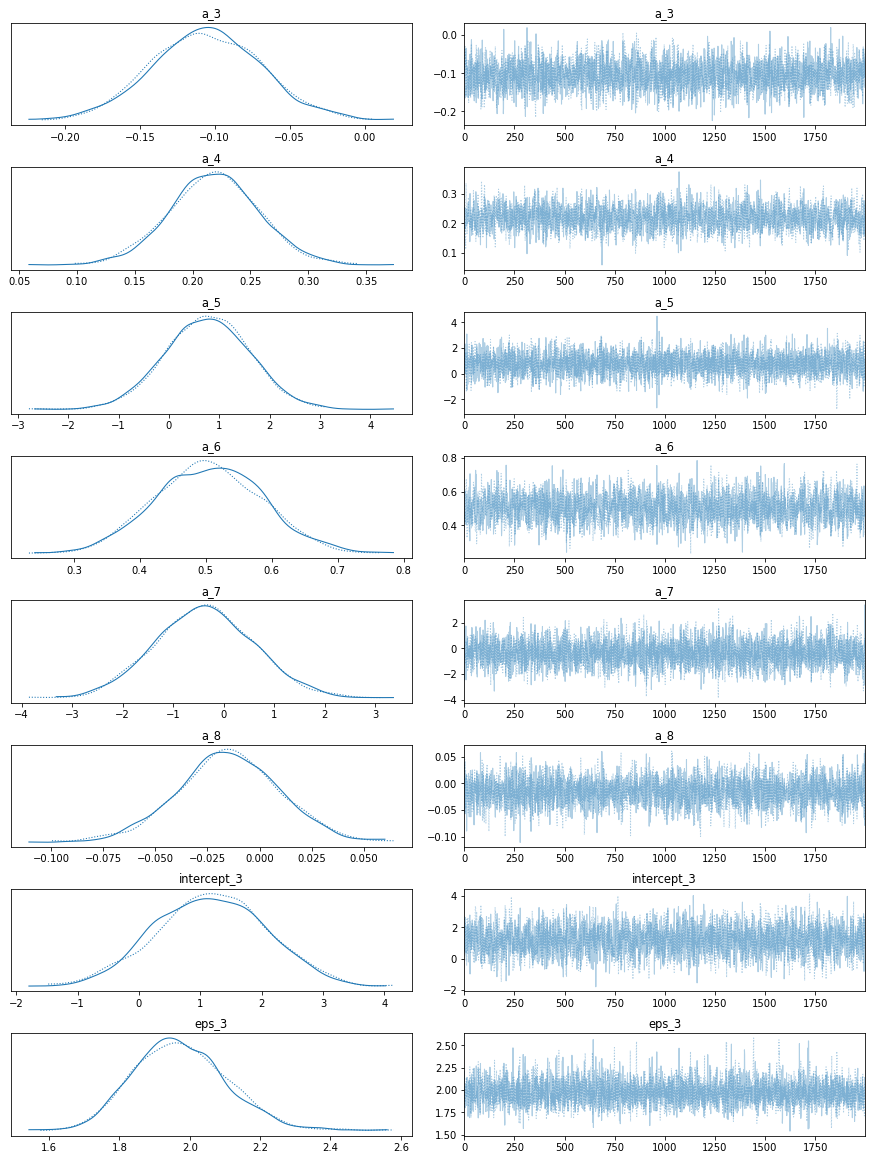

In [87]:
#Build the model for Cyanobacteria abundance
with pm.Model() as model_cyano:
    #model of parameters
    a_3 = pm.Normal("a_3", mu=0, sd=1)
    a_4 = pm.Normal("a_4", mu=0, sd=1)
    a_5 = pm.Normal("a_5", mu=0, sd=1)
    a_6 = pm.Normal("a_6", mu=0, sd=1)
    a_7 = pm.Normal("a_7", mu=0, sd=1)
    a_8 = pm.Normal("a_8", mu=0, sd=1)
    intercept_3 = pm.Normal("intercept_3", mu=0, sd=1)
    eps_3 = pm.HalfCauchy('eps_3', 5.)
    #deterministic model
    mu_9 = pm.Deterministic("mu_9", a_3*df_cyano['solar']+a_4*df_cyano['Temp']+a_5*df_cyano['TKN']+a_6*df_cyano['DO']+a_7*df_cyano['DP']+a_8*df_cyano['Turb']+intercept_3)
    #likelihood
    cyano = pm.Normal("cyano", mu= mu_9, sd=eps_3, observed = df_cyano['Cyano'])
    trace_cyano = pm.sample(2000, tune=2000, target_accept=0.9)
    pm.traceplot(trace_cyano, var_names=['a_3', 'a_4', 'a_5', 'a_6', 'a_7','a_8','intercept_3', 'eps_3'])

In [89]:
az.summary(trace_cyano).head(8)

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_3,-0.105,0.037,-0.173,-0.034,0.001,0.000,3001.0,2376.0,1.0
a_4,0.219,0.038,0.147,0.292,0.001,0.001,2280.0,2800.0,1.0
a_5,0.760,0.834,-0.849,2.272,0.013,0.012,4056.0,2754.0,1.0
a_6,0.504,0.081,0.346,0.648,0.002,0.001,2199.0,2762.0,1.0
a_7,-0.365,0.972,-2.234,1.398,0.015,0.016,4296.0,2701.0,1.0
a_8,-0.015,0.025,-0.060,0.033,0.000,0.000,3951.0,2636.0,1.0
intercept_3,1.183,0.900,-0.505,2.842,0.018,0.013,2512.0,2536.0,1.0
eps_3,1.976,0.138,1.736,2.232,0.002,0.002,4333.0,2451.0,1.0


/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-90-7fca0fa77430>:4: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  pm.energyplot(trace_temp, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Text(0.5, 1.0, 'BFMI = 1.0464596842569838\nGelman-Rubin = 1.0682757900540705')

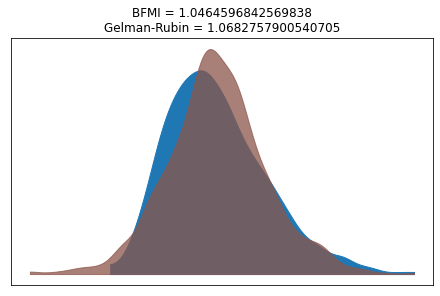

In [90]:
bfmi = np.max(pm.stats.bfmi(trace_cyano))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_temp).values()).values
(
    pm.energyplot(trace_temp, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

In [132]:
az.summary(trace_cyano).head(8)

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_3,-0.105,0.037,-0.173,-0.034,0.001,0.000,3001.0,2376.0,1.0
a_4,0.219,0.038,0.147,0.292,0.001,0.001,2280.0,2800.0,1.0
a_5,0.760,0.834,-0.849,2.272,0.013,0.012,4056.0,2754.0,1.0
a_6,0.504,0.081,0.346,0.648,0.002,0.001,2199.0,2762.0,1.0
a_7,-0.365,0.972,-2.234,1.398,0.015,0.016,4296.0,2701.0,1.0
a_8,-0.015,0.025,-0.060,0.033,0.000,0.000,3951.0,2636.0,1.0
intercept_3,1.183,0.900,-0.505,2.842,0.018,0.013,2512.0,2536.0,1.0
eps_3,1.976,0.138,1.736,2.232,0.002,0.002,4333.0,2451.0,1.0
